In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np 

In [ ]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
print('Training Images:{}'.format(X_train.shape))

print('Testing Images:{}'.format(X_test.shape))


Training Images:(50000, 32, 32, 3)
Testing Images:(10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)

(32, 32, 3)


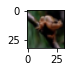

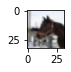

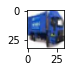

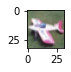

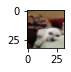

In [ ]:
for i in range(5000,5005):
  plt.subplot(5,1,i-5000+1)
  img=X_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
X_train=X_train.reshape(X_train.shape[0],32,32,3)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255
X_test/=255
n_classes=10

print("shape before one hot-encoding:",Y_train.shape)
Y_train=np_utils.to_categorical(Y_train,n_classes)
Y_test=np_utils.to_categorical(Y_test,n_classes)
print("shape after one hot-encoding:",Y_train.shape)

shape before one hot-encoding: (50000, 1)
shape after one hot-encoding: (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten


model=Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.25))


model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(10, activation='softmax'))

model.compile(loss='mse', metrics=['accuracy'], optimizer='adam')


model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 18s 23ms/step - loss: 0.0702 - accuracy: 0.4163 - val_loss: 0.0530 - val_accuracy: 0.5974
Epoch 2/10
391/391 [==============================] - 8s 21ms/step - loss: 0.0518 - accuracy: 0.6084 - val_loss: 0.0450 - val_accuracy: 0.6725
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0438 - accuracy: 0.6785 - val_loss: 0.0405 - val_accuracy: 0.7046
Epoch 4/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0394 - accuracy: 0.7150 - val_loss: 0.0373 - val_accuracy: 0.7288
Epoch 5/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0359 - accuracy: 0.7418 - val_loss: 0.0355 - val_accuracy: 0.7465
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0330 - accuracy: 0.7653 - val_loss: 0.0350 - val_accuracy: 0.7510
Epoch 7/10
391/391 [==============================] - 9s 22ms/step - loss: 0.0311 - accuracy: 0.7789 - val_loss: 0.0349 - val_accuracy: 0.753

In [ ]:
Classes=range(0,10)
names=['airplane',
       'automobile',
       'bird',
       'cat',
       'deer',
       'dog',
       'frog',
       'horse',
       'ship',
       'truck']
Class_labels=dict(zip(Classes,names))

batch=X_test[5000:5009]
labels=np.argmax(Y_test[5000:5009],axis=-1)

predictions=model.predict(batch,verbose=1)


1/1 [==============================] - 0s 189ms/step


In [ ]:
print(predictions)

[[1.04894399e-13 6.77938595e-16 4.66678096e-16 3.19656106e-14
  1.22494306e-11 4.41328045e-13 2.00661011e-20 1.00000000e+00
  5.38737567e-24 2.89802561e-15]
 [7.48006474e-13 2.02834971e-12 9.65073241e-07 2.79603078e-08
  1.35953460e-09 1.10815623e-09 9.99999046e-01 7.10622696e-14
  4.36228614e-12 4.66662130e-14]
 [6.05602167e-04 7.02877014e-06 8.85474893e-09 1.04765918e-09
  2.87694701e-10 2.88759044e-10 2.71593925e-09 4.10740365e-11
  9.99382854e-01 4.56295993e-06]
 [1.76528431e-02 1.79652439e-03 2.75846459e-02 2.09436808e-02
  7.18139112e-01 1.74861141e-02 1.94645636e-02 1.60468951e-01
  7.71543011e-03 8.74811225e-03]
 [9.39557236e-03 3.58943886e-04 6.84693009e-02 3.86991762e-02
  8.36169779e-01 2.21827738e-02 5.26149152e-03 1.83511004e-02
  7.62407028e-04 3.49421403e-04]
 [4.55372821e-04 2.14804095e-04 2.52263108e-03 1.11016028e-01
  3.13703041e-03 7.87505150e-01 1.09509157e-03 9.17145014e-02
  3.46319546e-04 1.99305289e-03]
 [1.76731080e-01 1.66639208e-03 1.85294941e-01 1.48405135e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0
1.0
1.0
0.9999999
0.99999994
1.0
1.0
1.0
1.0


In [ ]:
Class_result=np.argmax(predictions,axis=-1)
print(Class_result)

[7 6 8 4 4 5 4 3 4]


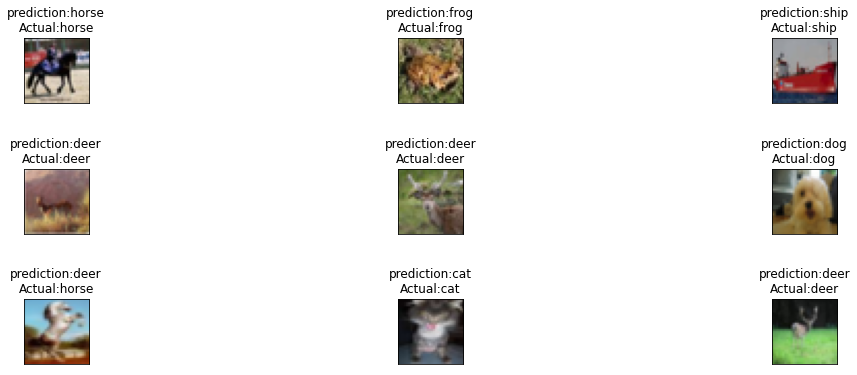

In [ ]:
fig, axs=plt.subplots(3, 3, figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

#i=5000

for i,img in enumerate(batch):
  for key ,value in Class_labels.items():
    if Class_result[i]==key:
      title='prediction:{}\nActual:{}'.format(Class_labels[key],Class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  axs[i].imshow(img)

#axs[1].set_axis_off()

plt.show()
